In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm



/Users/owner/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/owner/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [3]:
df_total = pd.read_csv('zillow-carlifornia .csv', parse_dates=True, squeeze=True)

In [4]:
df = df_total.iloc[:-20,]
df_test = df_total.iloc[-20:,]

In [6]:
df.head()

,Date,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
0,2004-01-31,326752.55,5.02,7.9,NaN
1,2004-02-29,329501.50,4.94,7.8,NaN
2,2004-03-31,340125.45,4.74,7.8,NaN
3,2004-04-30,355329.50,5.16,7.5,NaN
4,2004-05-31,367818.15,5.64,7.3,NaN


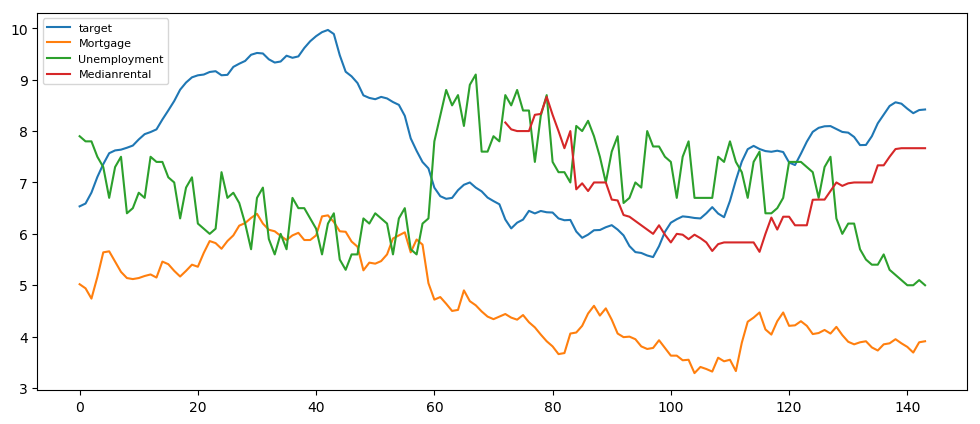

In [7]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df['MedianSoldPrice_AllHomes.California']/50000, label='target')
plt.plot(df['MedianMortageRate'], label='Mortgage')
plt.plot(df['UnemploymentRate'], label='Unemployment')
plt.plot(df['MedianRentalPrice_AllHomes.California']/300, label='Medianrental')
plt.legend(loc='upper left', fontsize=8)

plt.show()

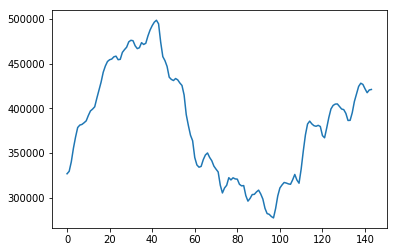

In [8]:
pyplot.plot(df['MedianSoldPrice_AllHomes.California'])
pyplot.show()

In [9]:
# X = df[['MedianMortageRate','MedianMortageRate']]
# train_size = int(X.shape[0] * 0.8)
# X_train = X[:train_size,]
# X_test = X[train_size:,]

In [5]:
series = df['MedianSoldPrice_AllHomes.California']

In [21]:
series

0      326752.55
1      329501.50
2      340125.45
3      355329.50
4      367818.15
5      378461.35
6      381175.00
7      381925.00
8      383775.00
9      385900.00
10     391850.00
11     397000.00
12     399050.00
13     401650.00
14     411250.00
15     420102.00
16     429251.40
17     440250.60
18     447225.00
19     452275.00
20     454250.00
21     455000.00
22     457500.00
23     458250.00
24     454300.00
25     454700.00
26     462450.00
27     465550.00
28     468250.00
29     474250.00
         ...    
114    385600.00
115    382550.00
116    380525.00
117    379850.00
118    380900.00
119    379600.00
120    369425.00
121    366950.00
122    377975.00
123    389700.00
124    399250.00
125    403150.00
126    404650.00
127    404850.00
128    402000.00
129    399150.00
130    398475.00
131    394275.00
132    386350.00
133    386500.00
134    395000.00
135    407550.00
136    416050.00
137    424400.00
138    428000.00
139    426650.00
140    421750.00
141    417400.

In [10]:
adf_test(series)

Results of Dickey-Fuller Test:
Test Statistic                  -2.768391
p-value                          0.062933
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


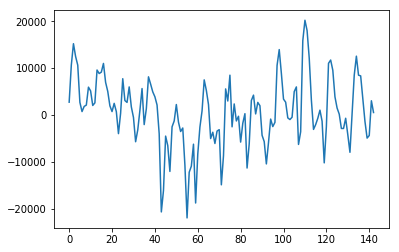

In [11]:
X=series
d1 = list()
for i in range(1, len(X)):
 value = X[i] - X[i - 1]
 d1.append(value)

plt.plot(d1) 
pyplot.show()

In [12]:
adf_test(d1)

Results of Dickey-Fuller Test:
Test Statistic                  -1.687305
p-value                          0.437665
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


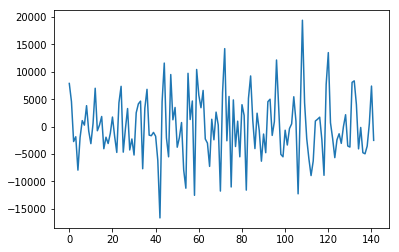

In [13]:
X=d1
d2 = list()
for i in range(1, len(X)):
 value = X[i] - X[i - 1]
 d2.append(value)

plt.plot(d2) 
pyplot.show()

In [14]:
adf_test(d2)

Results of Dickey-Fuller Test:
Test Statistic                  -4.918846
p-value                          0.000032
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


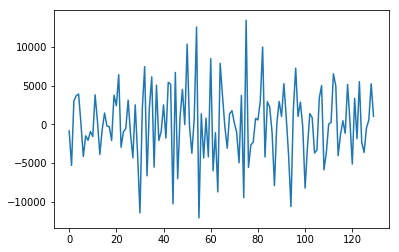

In [15]:
m = 12
X=d2
d3 = list()
for i in range(12, len(X)):
 value = X[i] - X[i - m]
 d3.append(value)

plt.plot(d3) 
pyplot.show()

In [16]:
adf_test(d3)

Results of Dickey-Fuller Test:
Test Statistic                  -5.149454
p-value                          0.000011
#Lags Used                      13.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


# SARIMA

In [7]:
X = series
train_size = int(len(X) * 0.8)
train = X[:train_size,]
valid = X[train_size:,]

In [8]:
#if we select model based on train directly
model2 = pm.auto_arima(train, start_p=1, start_q=1, # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=12,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=2, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model2.summary())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=1810.152, BIC=1822.651, Fit time=1.483 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 2, 0, 12); AIC=1887.649, BIC=1892.649, Fit time=0.023 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 2, 0, 12); AIC=1896.124, BIC=1906.124, Fit time=0.310 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=1841.415, BIC=1851.414, Fit time=0.295 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 2, 1, 12); AIC=1825.971, BIC=1840.970, Fit time=0.706 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 2, 0, 12); AIC=1894.700, BIC=1904.699, Fit time=0.223 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 2, 2, 12); AIC=1826.015, BIC=1841.013, Fit time=1.051 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 2, 2, 12); AIC=1825.582, BIC=1843.081, Fit time=2.527 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=1809.072, BIC=1824.071, Fit time=1.392 seconds
Fit ARIMA: order=(2, 1, 0) s

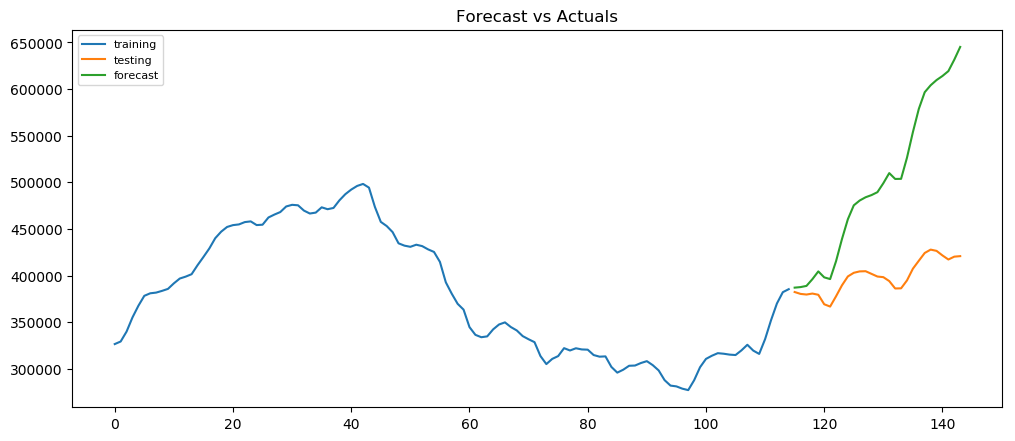

In [9]:
fitted2 = model2.fit(train)
fc2, conf2 = fitted2.predict(len(valid),return_conf_int=True,alpha=0.05)
fc_series2 = pd.Series(fc2, index=valid.index)
lower_series = pd.Series(conf2[:, 0], index=valid.index)
upper_series = pd.Series(conf2[:, 1], index=valid.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(valid, label='testing')
plt.plot(fc_series2, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [10]:
mse2 = ((fc_series2 - valid) ** 2).mean()
rmse2=round(np.sqrt(mse2), 2)
print(rmse2)

121219.29


In [56]:
# d=2,D=1, 230219.71
# d=2 D=2, 169021.03
# d=1 D=2, 23694.48
# SARIMAX, 87071.98

# ETS

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12,damped=True)
model2 = ExponentialSmoothing(train, trend="add", seasonal="mul", seasonal_periods=12, damped=True)
model3 = ExponentialSmoothing(train, trend="mul", seasonal="add", seasonal_periods=12, damped=True).fit()
fit = model.fit()
pred = fit.forecast(len(valid))
fit2 = model2.fit()
pred2 = fit2.forecast(len(valid))
# fit3 = model3.fit()
pred3 = model3.forecast(len(valid))

/Users/owner/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/owner/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/owner/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


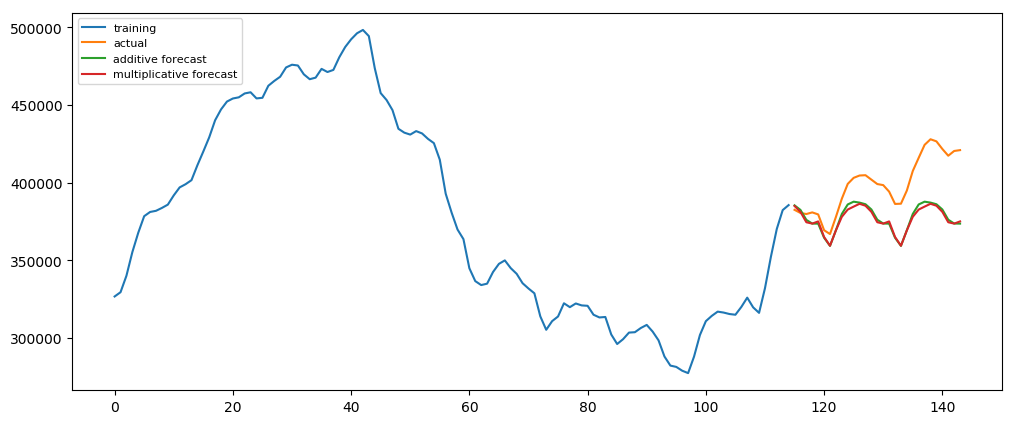

In [12]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(valid, label='actual')

plt.plot(pred, label='additive forecast')
plt.plot(pred2, label='multiplicative forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [32]:
rmse1 = np.sqrt(np.mean(np.square(valid.values- pred.values)))
rmse2 = np.sqrt(np.mean(np.square(valid.values- pred2.values)))
rmse3 = np.sqrt(np.mean(np.square(valid.values- pred3.values)))
print(rmse1)
print(rmse2)
print(rmse3)

25716.921247319475
26498.65288064476
44966.343491243606


# ETS with LOG-tranformation

In [15]:
train_log = np.log(train)
valid_log = np.log(valid)

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_log, trend="add", seasonal="add", seasonal_periods=12,damped=True)
model2 = ExponentialSmoothing(train_log, trend="add", seasonal="mul", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.forecast(len(valid_log))
fit2 = model2.fit()
pred2 = fit2.forecast(len(valid_log))

/Users/owner/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/owner/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [18]:
rmse1 = np.sqrt(np.mean(np.square(valid_log.values- pred.values)))
rmse2 = np.sqrt(np.mean(np.square(valid_log.values- pred2.values)))
print(rmse1)
print(rmse2)

0.068133752075157
0.06663877329024034


In [19]:
rmse1 = np.sqrt(np.mean(np.square(np.exp(valid_log.values)- np.exp(pred.values))))
rmse2 = np.sqrt(np.mean(np.square(np.exp(valid_log.values)- np.exp(pred2.values))))
print(rmse1)
print(rmse2)

26904.64892753495
26358.94084906362


In [22]:
valid_log.values

array([12.85461464, 12.84930716, 12.84753172, 12.85029215, 12.84687335,
       12.81970302, 12.81298088, 12.84258333, 12.87313249, 12.89734307,
       12.90706398, 12.91077777, 12.91127191, 12.90420737, 12.89709257,
       12.89540004, 12.88480391, 12.86449897, 12.86488715, 12.88664104,
       12.9179189 , 12.93856072, 12.95843169, 12.96687847, 12.96371928,
       12.952168  , 12.94180027, 12.94908085, 12.95038811])

In [20]:
pred.values

array([12.85575146, 12.84712386, 12.83017429, 12.82662546, 12.82936018,
       12.8029064 , 12.78789481, 12.8204618 , 12.85101371, 12.86588982,
       12.86769903, 12.86091777, 12.85623802, 12.8472261 , 12.83019578,
       12.82662998, 12.82936113, 12.8029066 , 12.78789485, 12.82046181,
       12.85101371, 12.86588982, 12.86769903, 12.86091777, 12.85623802,
       12.8472261 , 12.83019578, 12.82662998, 12.82936113])

# MULTI-VARIATE

In [144]:
X = df[['MedianMortageRate','UnemploymentRate']]
train_size = int(X.shape[0] * 0.8)
X_train = X.iloc[:train_size,]
X_valid = X.iloc[train_size:,]

In [145]:
modelx = SARIMAX(train, order=(1,1,1),seasonal_order=(0, 2, 1, 12),exog=X_train)
fitx=modelx.fit()
print(fitx.summary())

                                    Statespace Model Results                                   
Dep. Variable:     MedianSoldPrice_AllHomes.California   No. Observations:                  115
Model:                  SARIMAX(1, 1, 1)x(0, 2, 1, 12)   Log Likelihood                -894.942
Date:                                 Sat, 30 Nov 2019   AIC                           1801.884
Time:                                         16:56:29   BIC                           1816.883
Sample:                                              0   HQIC                          1807.932
                                                 - 115                                         
Covariance Type:                                   opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
MedianMortageRate  2147.9547   2250.691      0.954      0.34

/Users/owner/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [146]:
fc = fitx.predict(start=115, end=143, exog=X_valid)

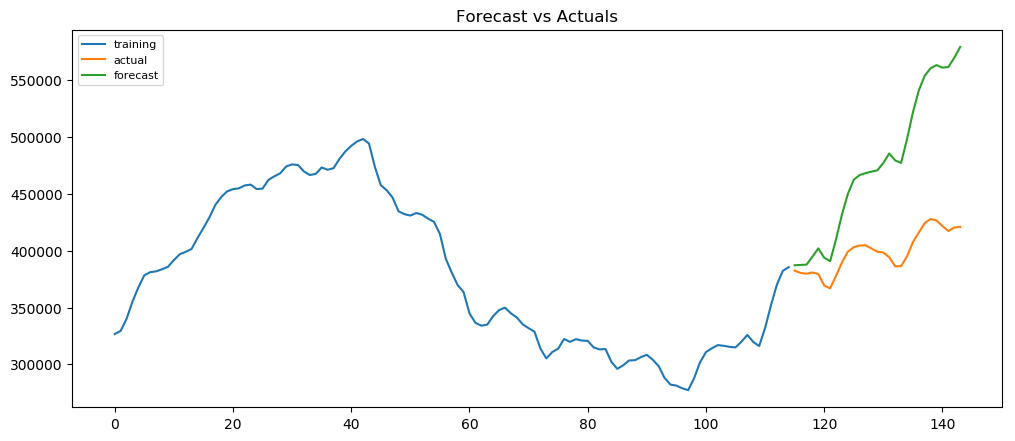

In [147]:
fc_series = pd.Series(fc)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(valid, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [148]:
mse = ((fc_series - valid) ** 2).mean()
rmse=round(np.sqrt(mse), 2)
print(rmse)

91003.7


# VAR

In [57]:
#VAR
series=df[['MedianMortageRate','UnemploymentRate','MedianSoldPrice_AllHomes.California']]
train = series[:int(0.80*(len(series)))]
test = series[int(0.80*(len(series))):]
train.head()

,MedianMortageRate,UnemploymentRate,MedianSoldPrice_AllHomes.California
0,5.02,7.9,12.696958
1,4.94,7.8,12.705336
2,4.74,7.8,12.737070
3,5.16,7.5,12.780801
4,5.64,7.3,12.815344


In [58]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit(2)
print(model_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 06, Dec, 2019
Time:                     17:48:55
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -12.5017
Nobs:                     113.000    HQIC:                  -12.8029
Log likelihood:           274.962    FPE:                2.24218e-06
AIC:                     -13.0085    Det(Omega_mle):     1.87224e-06
--------------------------------------------------------------------
Results for equation MedianMortageRate
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
const                                        -10.842224         3.264292           -3.321           0.001
L1.MedianMortageRate                           1.01576

In [59]:
fc = model_fit.forecast(model_fit.y, steps=len(test))
cols = series.columns
pred = pd.DataFrame(index=test.index,columns=[cols])
for j in range(0,3):
    for i in range(0, len(fc)):
       pred.iloc[i][j] = fc[i][j]

/Users/owner/anaconda3/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


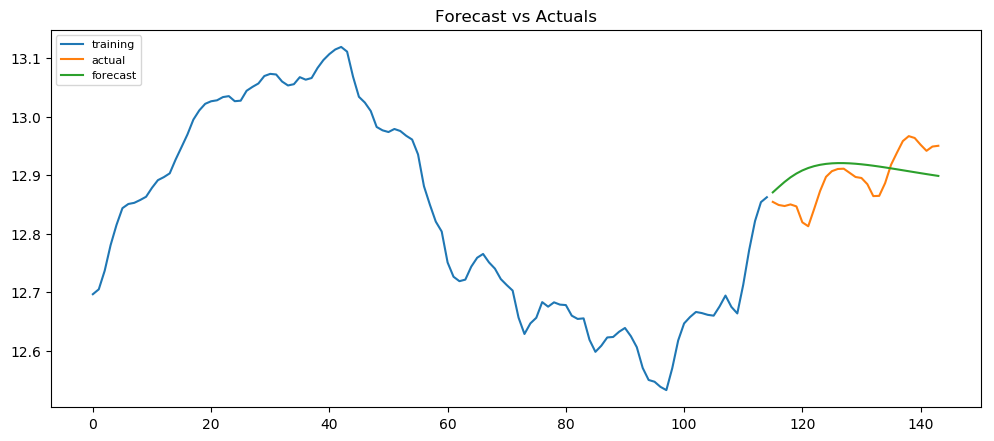

In [60]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train['MedianSoldPrice_AllHomes.California'], label='training')
plt.plot(test['MedianSoldPrice_AllHomes.California'], label='actual')
plt.plot(pred['MedianSoldPrice_AllHomes.California'], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [61]:
mse = ((pred['MedianSoldPrice_AllHomes.California'].values - test['MedianSoldPrice_AllHomes.California'].values) ** 2).mean()
rmse=round(np.sqrt(mse), 2)
print(rmse)

0.05


In [98]:
mse = ((np.exp(list(pred['MedianSoldPrice_AllHomes.California'].values.reshape(-1))) - np.exp(test['MedianSoldPrice_AllHomes.California'].values)) ** 2).mean()
rmse=round(np.sqrt(mse), 2)
print(rmse)

18351.01


In [97]:
np.exp(list(pred['MedianSoldPrice_AllHomes.California'].values.reshape(-1)))

array([388809.42806622, 392362.42220942, 395826.11506393, 398914.77639174,
       401525.78965775, 403653.37627351, 405332.95891508, 406614.1394648 ,
       407548.67805694, 408185.51397879, 408568.97600288, 408738.39399946,
       408728.29423782, 408568.81043112, 408286.14935434, 407903.04399664,
       407439.16935116, 406911.51426868, 406334.71033931, 405721.32151373,
       405082.09886468, 404426.20475109, 403761.41022073, 403094.2690013 ,
       402430.27097275, 401773.97761306, 401129.14156929, 400498.81221906,
       399885.42884686])

In [89]:
test['MedianSoldPrice_AllHomes.California'].values.shape

(29,)

In [50]:
series.describe()

,MedianMortageRate,UnemploymentRate,MedianSoldPrice_AllHomes.California
count,144.000000,144.000000,144.000000
mean,4.729097,6.888889,382373.555903
std,0.885744,0.957715,60742.371093
min,3.290000,5.000000,277400.000000
25%,3.950000,6.200000,322344.800000
50%,4.470000,6.800000,382467.500000
75%,5.502500,7.500000,429689.050000
max,6.390000,9.100000,498400.000000


In [55]:
df['MedianSoldPrice_AllHomes.California'] = np.log(df['MedianSoldPrice_AllHomes.California'])

/Users/owner/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
df['MedianSoldPrice_AllHomes.California']

0      12.696958
1      12.705336
2      12.737070
3      12.780801
4      12.815344
5      12.843869
6      12.851014
7      12.852980
8      12.857812
9      12.863334
10     12.878634
11     12.891692
12     12.896842
13     12.903336
14     12.926957
15     12.948253
16     12.969798
17     12.995099
18     13.010817
19     13.022046
20     13.026403
21     13.028053
22     13.033532
23     13.035170
24     13.026513
25     13.027393
26     13.044294
27     13.050975
28     13.056758
29     13.069490
         ...    
114    12.862556
115    12.854615
116    12.849307
117    12.847532
118    12.850292
119    12.846873
120    12.819703
121    12.812981
122    12.842583
123    12.873132
124    12.897343
125    12.907064
126    12.910778
127    12.911272
128    12.904207
129    12.897093
130    12.895400
131    12.884804
132    12.864499
133    12.864887
134    12.886641
135    12.917919
136    12.938561
137    12.958432
138    12.966878
139    12.963719
140    12.952168
141    12.9418